In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns


/var/folders/8j/skd2y7rd5k752cwx0v97h73c0000gn/T/ipykernel_86651/3496797893.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
train_df.drop(cat_feat, axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [13]:
print(train_df.describe())
print()
print("Pclass - passengers class from 1 to 3 (min 1, max 3) \nand other counted features")

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

Pclass - passengers class from 1 to 3 (min 1, max 3) 
and other counted features


In [14]:
print(train_df.groupby('Survived').mean())
print()
print("Grouped by 'Survived' count features: \nSurvived passengers near (high) class 1 and 2 \nand passengers which tickkets cost more")

            Pclass        Age     SibSp     Parch       Fare
Survived                                                    
0         2.531876  30.626179  0.553734  0.329690  22.117887
1         1.950292  28.343690  0.473684  0.464912  48.395408

Grouped by 'Survived' count features: 
Survived passengers near (high) class 1 and 2 
and passengers which tickkets cost more


In [16]:
print(train_df.groupby(train_df['Age'].isnull()).mean())
print()
print("This code show us that the age was absent in 3rd class passengers")

       Survived    Pclass        Age     SibSp     Parch       Fare
Age                                                                
False  0.406162  2.236695  29.699118  0.512605  0.431373  34.694514
True   0.293785  2.598870        NaN  0.564972  0.180791  22.158567

This code show us that the age was absent in 3rd class passengers


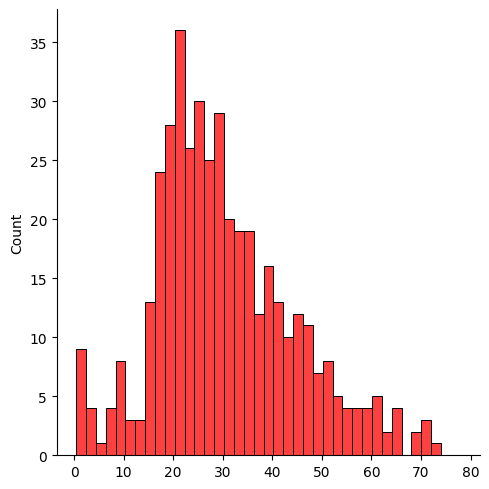

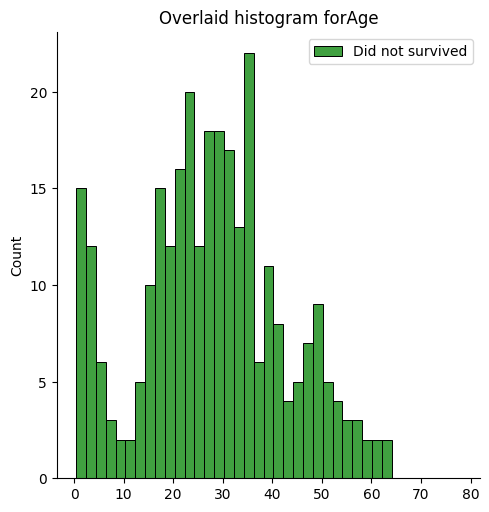

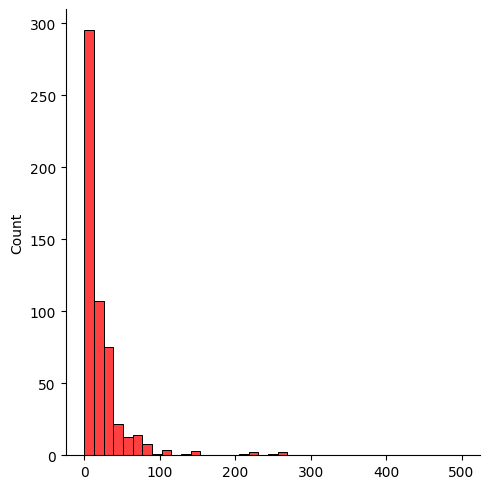

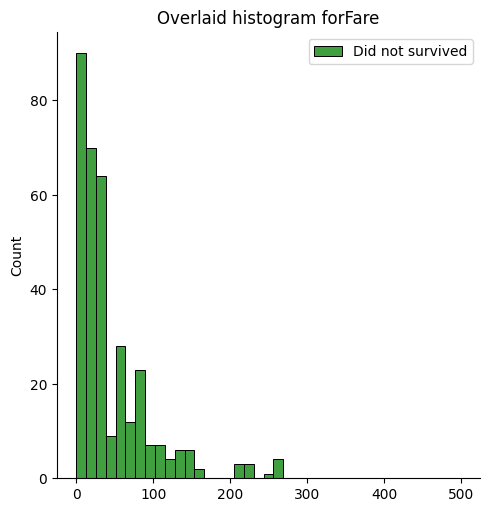

In [20]:
import matplotlib.pyplot as plt
for i in ['Age', 'Fare']:
    died = list(train_df[train_df['Survived'] == 0][i].dropna())
    survived = list(train_df[train_df['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.displot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.displot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survived', 'Survived'])
    plt.title('Overlaid histogram for{}'.format(i))
    plt.show()

<Figure size 640x480 with 0 Axes>

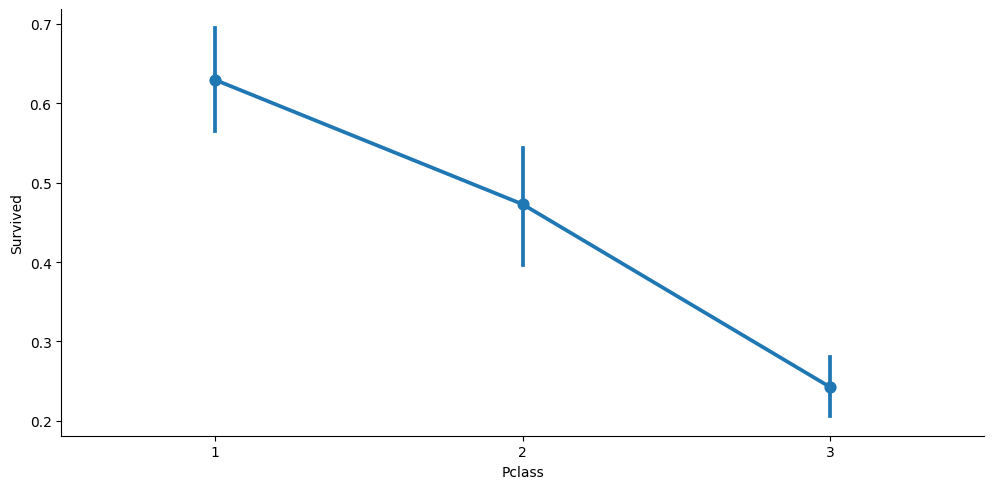

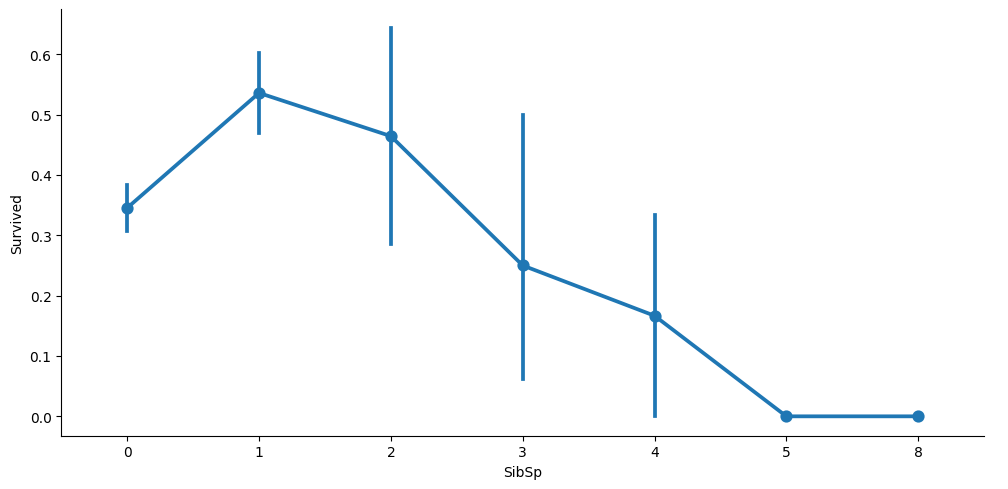

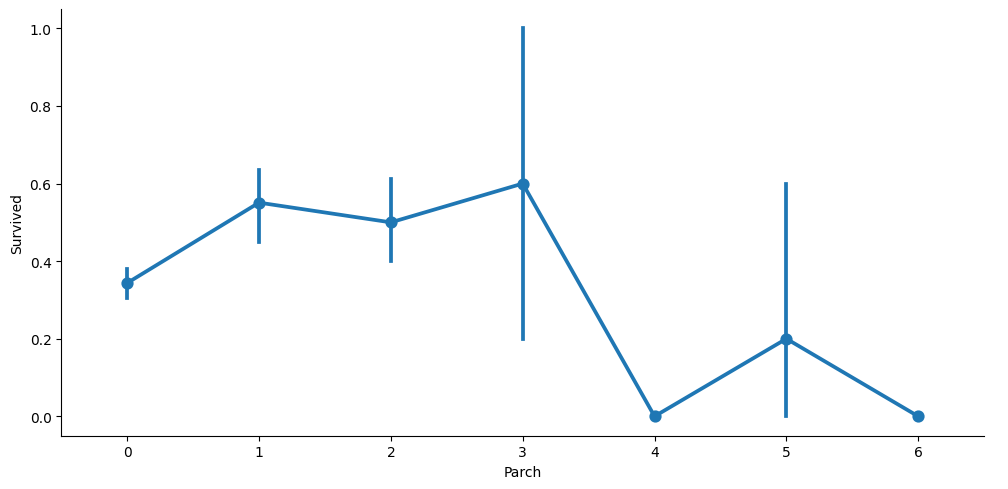

In [22]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2,)
    

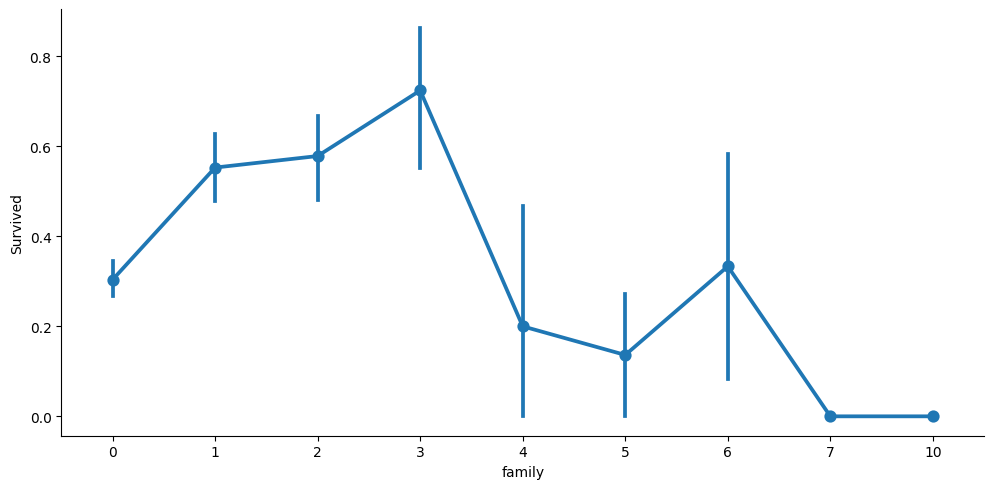

In [23]:
train_df['family'] = train_df['SibSp'] + train_df['Parch']
sns.catplot(x='family', y='Survived', data=train_df, kind='point', aspect=2,)

In [24]:
train_df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
family        0
dtype: int64

In [25]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df.isnull().sum()

/var/folders/8j/skd2y7rd5k752cwx0v97h73c0000gn/T/ipykernel_79864/2558582982.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)


Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
family      0
dtype: int64

In [26]:
train_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,family
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


In [27]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Age,Fare,family
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
